In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('laptop_price.xlsx')

# Data Cleansing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [4]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


### Rename Column:

In [5]:
df.rename({'Manufacturer':'Laptop Brand',
           'Category':'Laptop Type',
           'Screen':'Screen Resolution',
           ' Storage': 'Storage',
           'Screen Size' : 'Screen Size (Inches)'},axis=1,inplace=True)

### Handled Missing Value:

In [6]:
# Missing Value Percentage
100.00 * (df.isnull().sum() / df.shape[0])

Laptop Brand                 0.000000
Model Name                   0.000000
Laptop Type                  0.000000
Screen Size (Inches)         0.000000
Screen Resolution            0.000000
CPU                          0.000000
RAM                          0.000000
Storage                      0.000000
GPU                          0.000000
Operating System             0.000000
Operating System Version    13.046815
Weight                       0.000000
Price (Euros)                0.000000
dtype: float64

In [7]:
df['Operating System Version'].value_counts()

10      1072
7         45
X          8
10 S       8
Name: Operating System Version, dtype: int64

In [8]:
# Actually operating system version null value can be filled by mode, but operating system version is not significant feature
# it's because when buying a laptop, operating system version can be updated into the newest ready version
df.drop(['Operating System Version'],axis=1,inplace=True)

### Handled Duplicated Value:

In [9]:
df.duplicated().any()

True

In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Laptop Brand          1275 non-null   object
 1   Model Name            1275 non-null   object
 2   Laptop Type           1275 non-null   object
 3   Screen Size (Inches)  1275 non-null   object
 4   Screen Resolution     1275 non-null   object
 5   CPU                   1275 non-null   object
 6   RAM                   1275 non-null   object
 7   Storage               1275 non-null   object
 8   GPU                   1275 non-null   object
 9   Operating System      1275 non-null   object
 10  Weight                1275 non-null   object
 11  Price (Euros)         1275 non-null   object
dtypes: object(12)
memory usage: 129.5+ KB


### Replace Incorrect Value:

In [12]:
df['RAM'] = df['RAM'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Screen Size (Inches)'] = df['Screen Size (Inches)'].str.replace('"','')
df['Price (Euros)'] = df['Price (Euros)'].str.replace(',','.')
df['Weight'] = df['Weight'].str.replace('4s','4.0')

In [13]:
df['Operating System'].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

In [14]:
# Mac OS is the same with macOS
df['Operating System'] = df['Operating System'].replace('Mac OS', 'macOS')

### Change Data Type:

In [15]:
nums_float = ['RAM','Weight','Screen Size (Inches)','Price (Euros)']
for i in nums_float:
    df[i] = df[i].astype(float)

# Exploratory Data Analysis

In [16]:
nums = ['RAM','Screen Size (Inches)', 'Weight', 'Price (Euros)']
cats = ['Laptop Brand', 'Model Name', 'Laptop Type', 'Screen Resolution',
        'CPU', 'Storage', 'GPU', 'Operating System']

In [17]:
df[nums].describe()

,RAM,Screen Size (Inches),Weight,Price (Euros)
count,1275.000000,1275.000000,1275.000000,1275.000000
mean,8.440784,15.022902,2.040525,1134.969059
std,5.097809,1.429470,0.669196,700.752504
min,2.000000,10.100000,0.690000,174.000000
25%,4.000000,14.000000,1.500000,609.000000
50%,8.000000,15.600000,2.040000,989.000000
75%,8.000000,15.600000,2.310000,1496.500000
max,64.000000,18.400000,4.700000,6099.000000


In [18]:
df[cats].describe()

,Laptop Brand,Model Name,Laptop Type,Screen Resolution,CPU,Storage,GPU,Operating System
count,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,40,118,38,110,6
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows
freq,291,30,707,505,190,412,279,1101


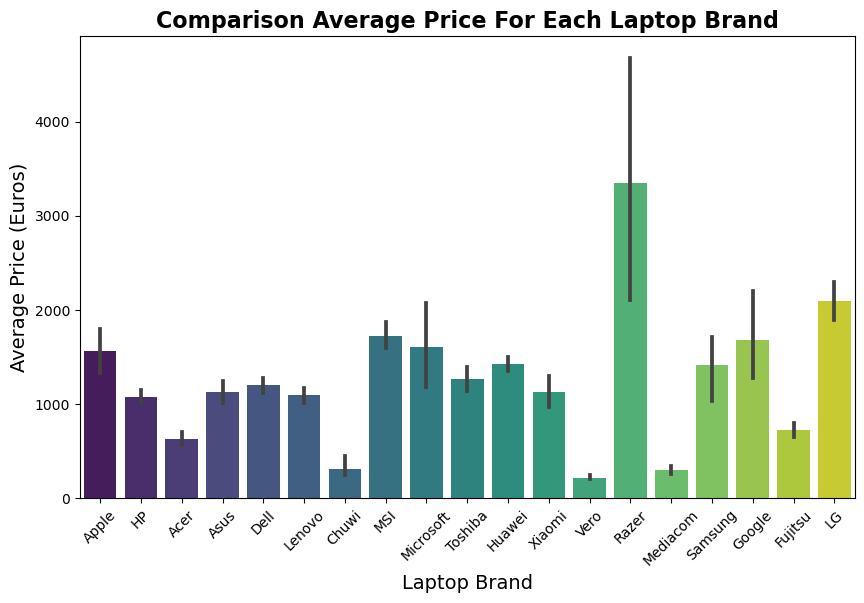

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Laptop Brand'],y=df['Price (Euros)'],palette='viridis')
plt.title('Comparison Average Price For Each Laptop Brand',fontsize=16,fontweight='bold')
plt.xlabel('Laptop Brand',fontsize=14)
plt.ylabel('Average Price (Euros)',fontsize=14)
plt.xticks(rotation=45)
plt.show()

* Laptop Brand dengan rata-rata harga paling mahal adalah laptop dengan brand Razer.

In [20]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: CPU, Length: 118, dtype: int64

In [21]:
df['CPU_Name'] = df['CPU'].apply(lambda x : ' '.join(x.split()[0:3]))

In [22]:
df['CPU_Name'].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           70
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
AMD A6-S

In [23]:
def extract_cpu_type(x):
    if x == 'Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        return x
    elif x.split()[0] == 'Intel':
        return 'Other Intel Processor'
    elif x.split()[0] == 'AMD':
        return 'AMD'
    else:
        return 'Others'

In [24]:
df['CPU_Name'] = df['CPU_Name'].apply(extract_cpu_type)

In [25]:
df['CPU_Name'].value_counts()

Intel Core i7            515
Intel Core i5            423
Other Intel Processor    142
Intel Core i3            134
AMD                       60
Others                     1
Name: CPU_Name, dtype: int64

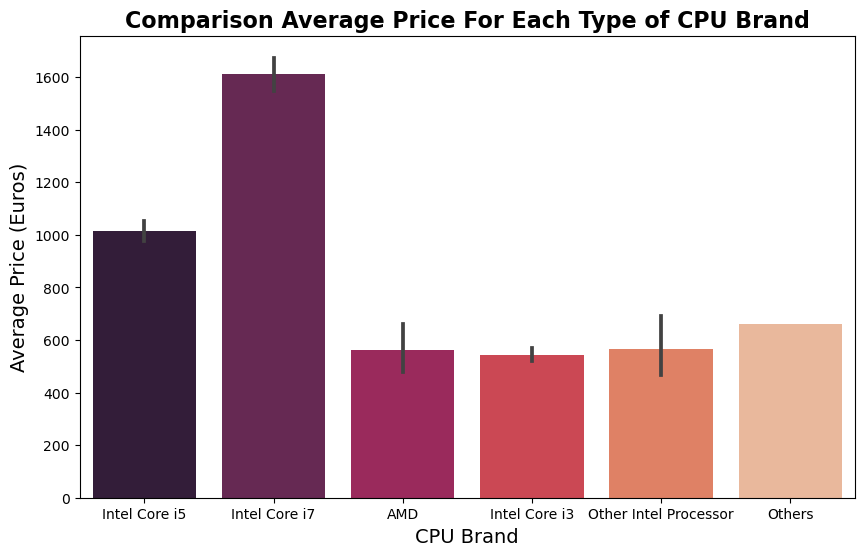

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['CPU_Name'],y=df['Price (Euros)'],palette='rocket')
plt.title('Comparison Average Price For Each Type of CPU Brand',fontsize=16,fontweight='bold')
plt.xlabel('CPU Brand',fontsize=14)
plt.ylabel('Average Price (Euros)',fontsize=14)
plt.show()

* Paling mahal adalah CPU Brand Intel Core i7, yang kedua adalah Intel Core i5.

In [27]:
df['GPU'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: GPU, Length: 110, dtype: int64

In [28]:
df['GPU_Name'] = df['GPU'].apply(lambda x : ' '.join(x.split()[0:1]))

In [29]:
df['GPU_Name'].value_counts()

Intel     704
Nvidia    396
AMD       174
ARM         1
Name: GPU_Name, dtype: int64

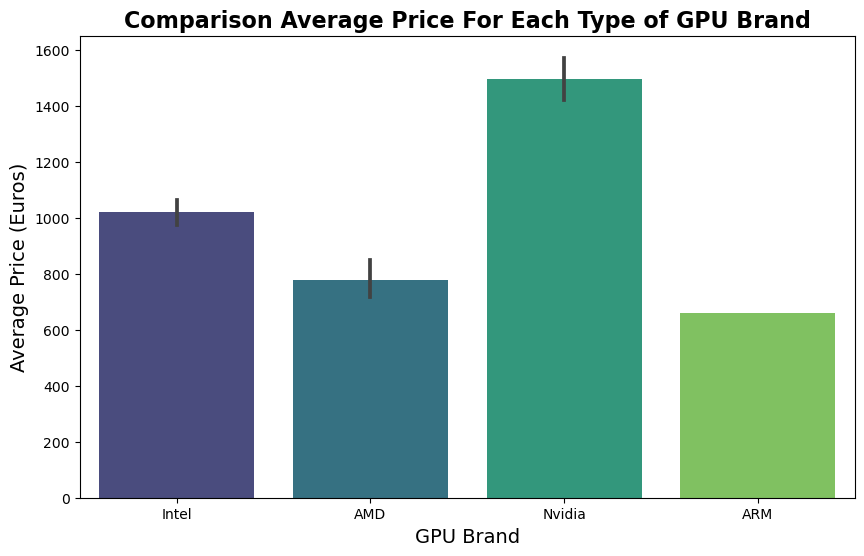

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['GPU_Name'],y=df['Price (Euros)'],palette='viridis')
plt.title('Comparison Average Price For Each Type of GPU Brand',fontsize=16,fontweight='bold')
plt.xlabel('GPU Brand',fontsize=14)
plt.ylabel('Average Price (Euros)',fontsize=14)
plt.show()

* Paling mahal adalah GPU Brand Nvidia, dan yang kedua adalah Intel.

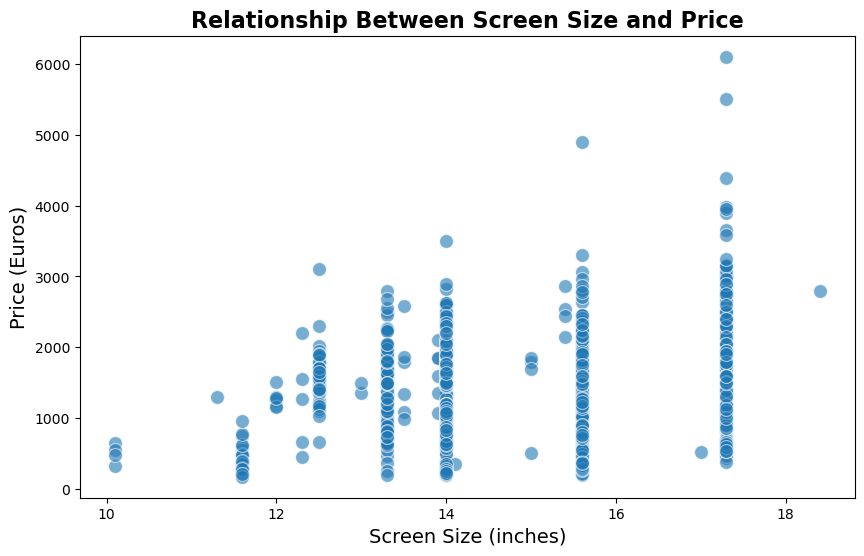

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['Screen Size (Inches)'],
                y = df['Price (Euros)'],
                alpha = 0.6, s = 100)
plt.title('Relationship Between Screen Size and Price' ,
         fontsize = 16, fontweight = 'bold')
plt.xlabel('Screen Size (inches)', fontsize = 14)
plt.ylabel('Price (Euros)', fontsize = 14)
plt.show()

* Dapat dilihat bahwa secara garis besar ukuran layar tidak terlalu menentukan harga dari sebuah laptop, namun dapat dilihat juga bahwa ada beberapa contoh dimana ketika ukuran screen yang besar maka harga laptop juga akan semakin tinggi.

In [32]:
df['IsTouchScreen'] = df['Screen Resolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

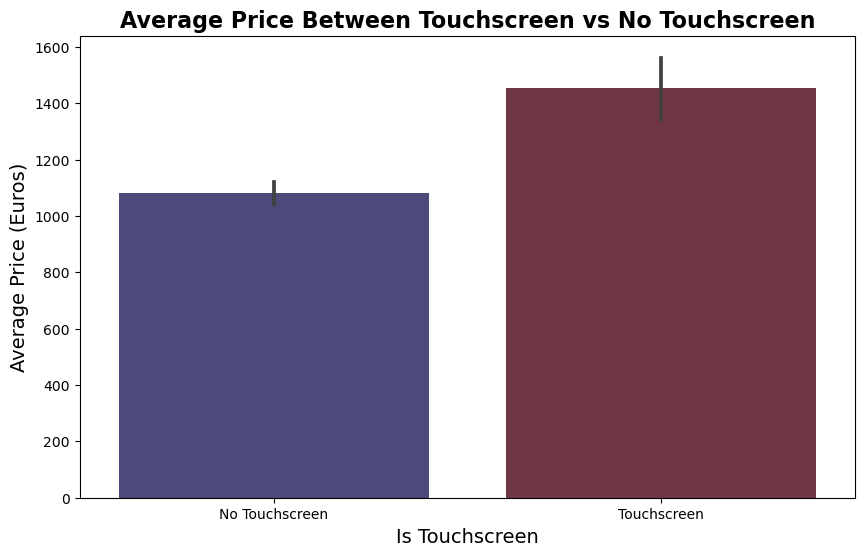

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['IsTouchScreen'],y=df['Price (Euros)'],palette='icefire')
plt.title('Average Price Between Touchscreen vs No Touchscreen',fontsize=16,fontweight='bold')
plt.xlabel('Is Touchscreen',fontsize=14)
plt.ylabel('Average Price (Euros)',fontsize=14)
plt.xticks([0,1],['No Touchscreen','Touchscreen'])
plt.show()

* Laptop yang memiliki fitur touchscreen secara rata-rata memiliki harga yang lebih mahal dibandingkan yang tidak memiliki fitur touchcscreen.

In [34]:
df['IsIPS'] = df['Screen Resolution'].apply(lambda x : 1 if 'IPS' in x else 0)

https://history-computer.com/ips-vs-led-monitors/

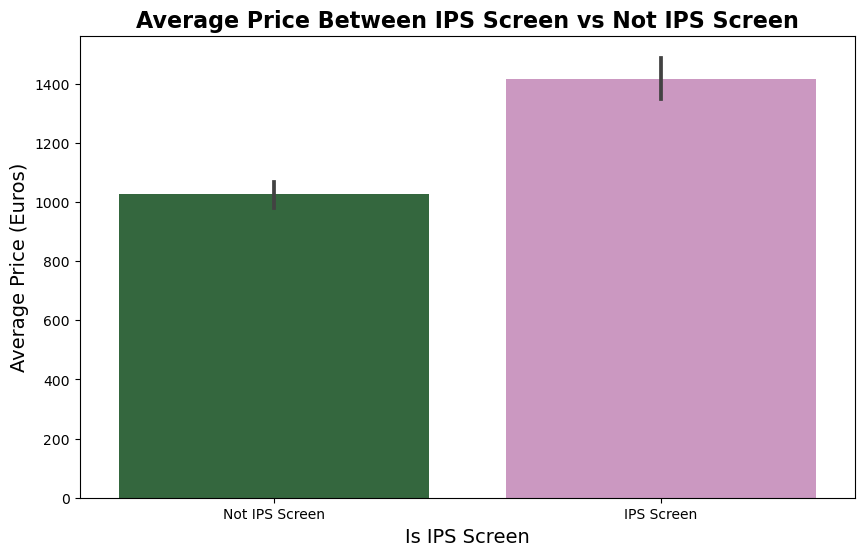

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['IsIPS'],y=df['Price (Euros)'],palette='cubehelix')
plt.title('Average Price Between IPS Screen vs Not IPS Screen',fontsize=16,fontweight='bold')
plt.xlabel('Is IPS Screen',fontsize=14)
plt.ylabel('Average Price (Euros)',fontsize=14)
plt.xticks([0,1],['Not IPS Screen','IPS Screen'])
plt.show()

* Laptop yang menggunakan IPS Screen secara rata-rata memiliki harga yang lebih mahal dibandingkan yang tidak menggunakan IPS Screen.

In [36]:
df['RAM'].value_counts()

8.0     613
4.0     367
16.0    198
6.0      35
12.0     25
32.0     17
2.0      16
24.0      3
64.0      1
Name: RAM, dtype: int64

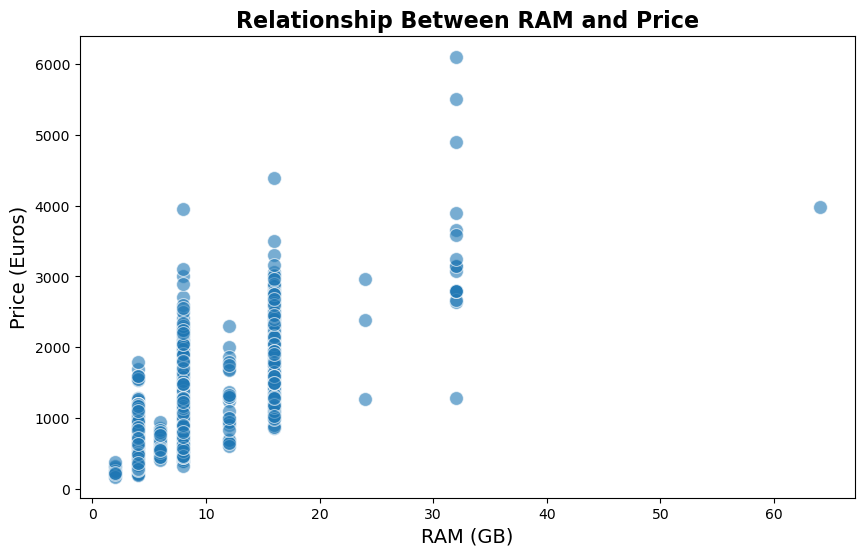

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['RAM'],
                y = df['Price (Euros)'],
                alpha = 0.6, s = 100)
plt.title('Relationship Between RAM and Price' ,
         fontsize = 16, fontweight = 'bold')
plt.xlabel('RAM (GB)', fontsize = 14)
plt.ylabel('Price (Euros)', fontsize = 14)
plt.show()

* Besarnya RAM juga mempengaruhi harga laptop, dimana semakin besar RAM maka harga laptop juga akan semakin mahal.

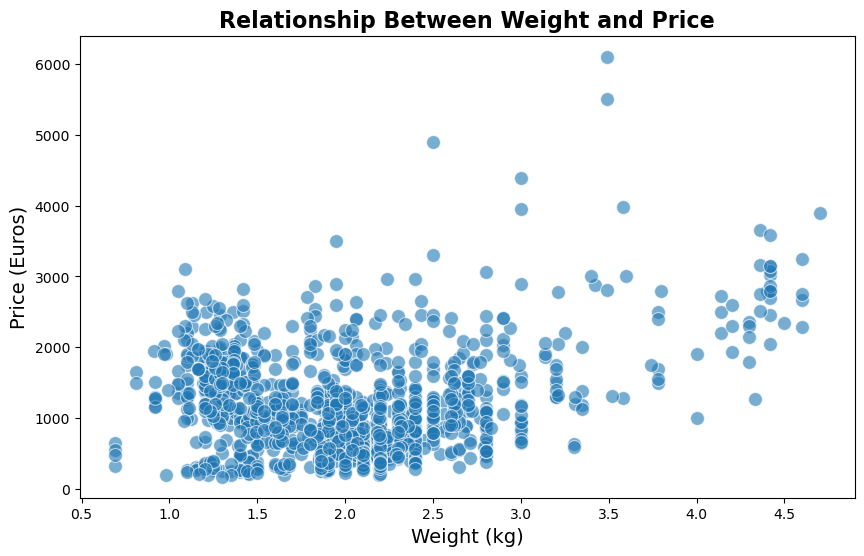

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['Weight'],
                y = df['Price (Euros)'],
                alpha = 0.6, s = 100)
plt.title('Relationship Between Weight and Price' ,
         fontsize = 16, fontweight = 'bold')
plt.xlabel('Weight (kg)', fontsize = 14)
plt.ylabel('Price (Euros)', fontsize = 14)
plt.show()

* Tidak terlalu mempengaruhi besarnya weight dengan Price, meskipun jika dilihat ada korelasi walaupun lemah.

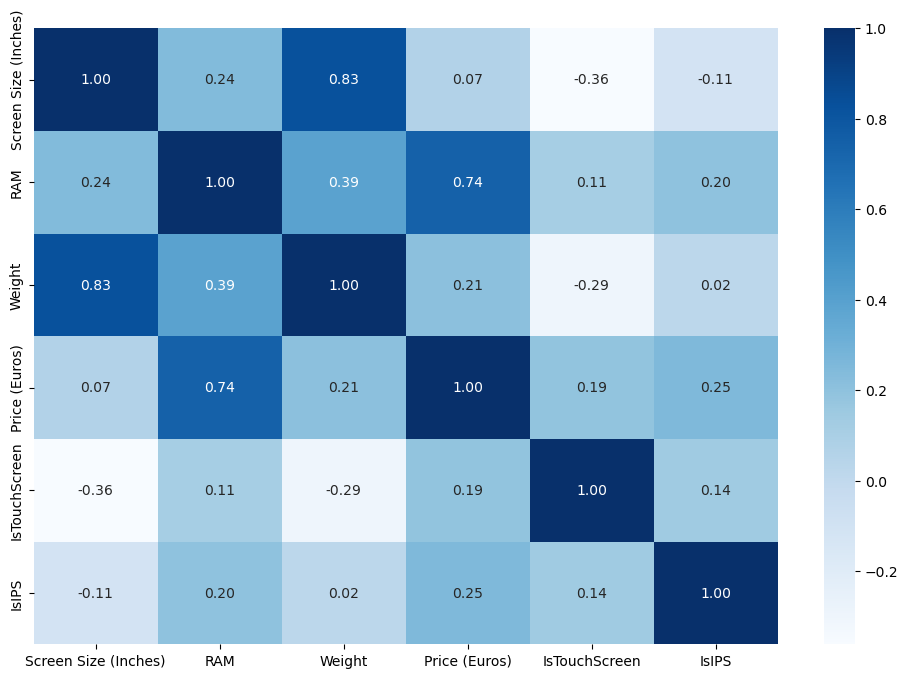

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

# Preprocssing

### Feature Engineering:

In [40]:
# Storage Feature
df['Storage'] = df['Storage'].str.replace('GB','')
df['Storage'] = df['Storage'].str.replace('TB','000')
new = df['Storage'].str.split('+', expand=True)

In [41]:
# Make Boolean Column for HDD, SSD, Flash Storage, and Hybrid
df['first_layer'] = new[0]
df['layer_1_HDD'] = df['first_layer'].apply(lambda x : 1 if 'HDD' in x else 0)
df['layer_1_SSD'] = df['first_layer'].apply(lambda x : 1 if 'SSD' in x else 0)
df['layer_1_fstorage'] = df['first_layer'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['layer_1_hybrid'] = df['first_layer'].apply(lambda x : 1 if 'Hybrid' in x else 0)

df['second_layer'] = new[1]
df['second_layer'] = df['second_layer'].str.replace('  ', '')  
df['second_layer'] = df['second_layer'].fillna("0")
df['layer_2_HDD'] = df['second_layer'].apply(lambda x : 1 if 'HDD' in x else 0)
df['layer_2_SSD'] = df['second_layer'].apply(lambda x : 1 if 'SSD' in x else 0)
df['layer_2_fstorage'] = df['second_layer'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['layer_2_hybrid'] = df['second_layer'].apply(lambda x : 1 if 'Hybrid' in x else 0)

# Make first layer & second layer contains only numeric
new_first_layer = df['first_layer'].str.split(' ',expand=True)
df['first_layer'] = new_first_layer[0]
df['first_layer'] = df['first_layer'].astype(int)

new_second_layer = df['second_layer'].str.split(' ',expand=True)
df['second_layer'] = new_second_layer[0]
df['second_layer'] = df['second_layer'].astype(int)

# Make Numeric Column for HDD, SSD, Flash Storage, and Hybrid
df['HDD'] = ((df['first_layer'] * df['layer_1_HDD']) + (df['second_layer'] * df['layer_2_HDD']))
df['SSD'] = ((df['first_layer'] * df['layer_1_SSD']) + (df['second_layer'] * df['layer_2_SSD']))
df['Flash_Storage'] = ((df['first_layer'] * df['layer_1_fstorage']) + (df['second_layer'] * df['layer_2_fstorage']))
df['Hybrid'] = ((df['first_layer'] * df['layer_1_hybrid']) + (df['second_layer'] * df['layer_2_hybrid']))

# Drop unused column related to storage
df.drop(['first_layer','layer_1_HDD','layer_1_SSD','layer_1_fstorage','layer_1_hybrid',
         'second_layer','layer_2_HDD','layer_2_SSD','layer_2_fstorage','layer_2_hybrid'],axis=1,inplace=True)

# Drop Storage feature because already represent with HDD, SSD, Flash Storage & Hybrid
df.drop(['Storage'],axis=1,inplace=True)

In [42]:
# Screen Feature
df['Model Name'].nunique()

618

In [43]:
# Screen Feature seems not be important feature because have too many unique value
df.drop(['Model Name'],axis=1,inplace=True)

# Drop CPU & GPU feature because already represented by CPU_Name & GPU_Name
df.drop(['CPU','GPU'],axis=1,inplace=True)

In [44]:
df.head()

,Laptop Brand,Laptop Type,Screen Size (Inches),Screen Resolution,RAM,Operating System,Weight,Price (Euros),CPU_Name,GPU_Name,IsTouchScreen,IsIPS,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,macOS,1.37,1339.69,Intel Core i5,Intel,0,1,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8.0,macOS,1.34,898.94,Intel Core i5,Intel,0,0,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,8.0,No OS,1.86,575.00,Intel Core i5,Intel,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16.0,macOS,1.83,2537.45,Intel Core i7,AMD,0,1,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,macOS,1.37,1803.60,Intel Core i5,Intel,0,1,0,256,0,0


In [45]:
# Extract X_resolution & Y_resolution from Screen Resolution feature
new = df['Screen Resolution'].str.split('x',expand=True)
X_resolution = new[0]
Y_resolution = new[1]

# Make X_resolution & Y_resolution feature
df['X_resolution'] = X_resolution.str.extract('(\d+)')
df['X_resolution'] = df['X_resolution'].astype(int)
df['Y_resolution'] = Y_resolution
df['Y_resolution'] = df['Y_resolution'].astype(int)

# Drop Screen Resolution feature because already represent with X_resolution & Y_resolution
df.drop(['Screen Resolution'],axis=1,inplace=True)

In [46]:
# Feature Engineering --> Pixel per inch
df['pixel/inch'] = (df['X_resolution']**2 + df['Y_resolution']**2)**0.5 / df['Screen Size (Inches)']

# Drop Screen Size (Inches), X_resolution, and Y_resolution feature because already represent with pixel/inch
df.drop(['Screen Size (Inches)', 'X_resolution', 'Y_resolution'],axis=1,inplace=True)

In [47]:
df.head()

,Laptop Brand,Laptop Type,RAM,Operating System,Weight,Price (Euros),CPU_Name,GPU_Name,IsTouchScreen,IsIPS,HDD,SSD,Flash_Storage,Hybrid,pixel/inch
0,Apple,Ultrabook,8.0,macOS,1.37,1339.69,Intel Core i5,Intel,0,1,0,128,0,0,226.983005
1,Apple,Ultrabook,8.0,macOS,1.34,898.94,Intel Core i5,Intel,0,0,0,0,128,0,127.677940
2,HP,Notebook,8.0,No OS,1.86,575.00,Intel Core i5,Intel,0,0,0,256,0,0,141.211998
3,Apple,Ultrabook,16.0,macOS,1.83,2537.45,Intel Core i7,AMD,0,1,0,512,0,0,220.534624
4,Apple,Ultrabook,8.0,macOS,1.37,1803.60,Intel Core i5,Intel,0,1,0,256,0,0,226.983005


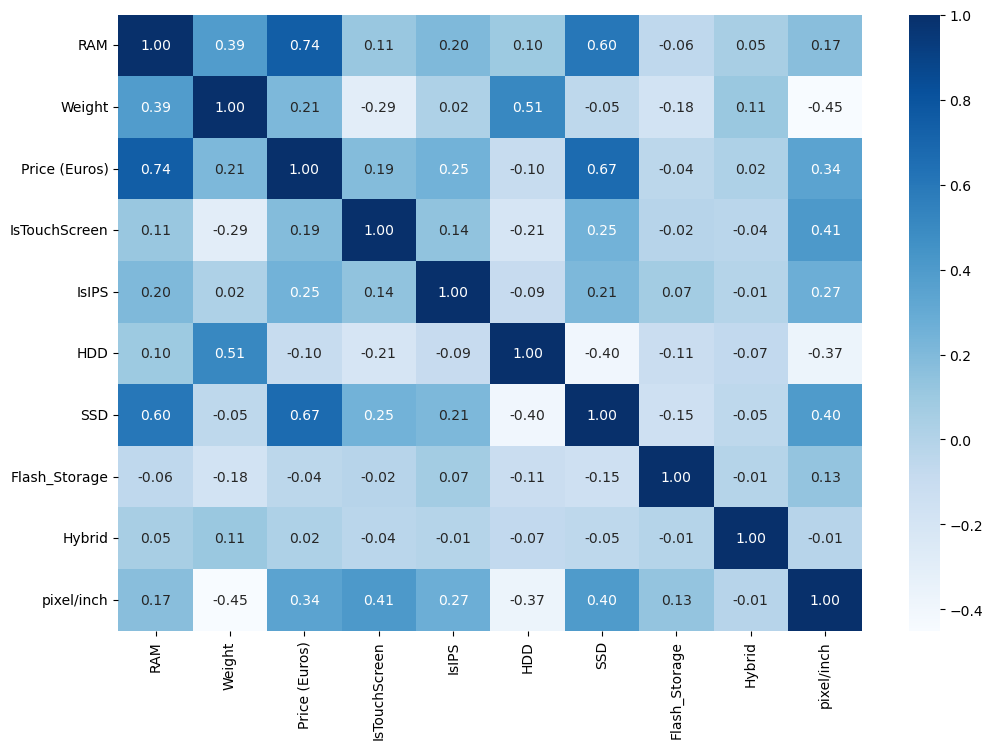

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [49]:
X = df.drop(['Price (Euros)'],axis=1)
y = np.log(df['Price (Euros)'])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.2)

In [51]:
# Log Transformation (not in pipeline because it will cause error when deploy into streamlit)
log_transform_feats = ['RAM','Weight','pixel/inch']
for i in log_transform_feats:
    X_train[log_transform_feats] = np.log1p(X_train[log_transform_feats])
    X_test[log_transform_feats] = np.log1p(X_test[log_transform_feats])

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
model_1 = LinearRegression()
model_2 = DecisionTreeRegressor(random_state=42)
model_3 = RandomForestRegressor(random_state=42)
model_4 = XGBRegressor(random_state=42)

model_list = [model_1,model_2,model_3,model_4]

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 413 to 1126
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Laptop Brand      1020 non-null   object 
 1   Laptop Type       1020 non-null   object 
 2   RAM               1020 non-null   float64
 3   Operating System  1020 non-null   object 
 4   Weight            1020 non-null   float64
 5   CPU_Name          1020 non-null   object 
 6   GPU_Name          1020 non-null   object 
 7   IsTouchScreen     1020 non-null   int64  
 8   IsIPS             1020 non-null   int64  
 9   HDD               1020 non-null   int64  
 10  SSD               1020 non-null   int64  
 11  Flash_Storage     1020 non-null   int64  
 12  Hybrid            1020 non-null   int64  
 13  pixel/inch        1020 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 119.5+ KB


In [54]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from IPython.display import clear_output
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import time

ml_model = []
score_r2_test = []
score_rmse_test = []
score_rmse_train = []
score_mae_test = []
score_mape_test = []
time_training = []

for model in model_list:
    print(f"Processing {model.__class__.__name__}")
    
    start_time = time.time()
    #One Hot Encoding
    ohe = ColumnTransformer(transformers=[
        ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,3,5,6]),
        ],verbose_feature_names_out=True,remainder='passthrough')
    
    '''Log Transformation
    log_transform = ColumnTransformer(transformers=[
        ('log', FunctionTransformer(np.log1p), [2,4,13]),
       ],verbose_feature_names_out=False,remainder='passthrough')'''
    
    #Standardization
    std_scaler = ColumnTransformer(transformers=[
        ('scale', StandardScaler(), [9,10,11,12]),
        ],verbose_feature_names_out=False,remainder='passthrough')
    
    #Defining Pipeline
    pipe = Pipeline([('ohe',ohe),
                     #('log_transform',log_transform),
                     ('std_scaler',std_scaler),
                     ('model',model)])
    
    #Defining evaluation procedure (here we use Repeated K-Fold CV)
    cv = KFold(n_splits=5)
    
    # Evaluate model
    scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error']
    
    scores = cross_validate(pipe, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            cv = cv, 
                            n_jobs = -1,return_train_score=True)
    
    ml_model.append(model.__class__.__name__)
    score_r2_test.append(np.mean(scores['test_r2']))
    score_rmse_train.append(np.mean(scores['train_neg_root_mean_squared_error']))
    score_rmse_test.append(np.mean(scores['test_neg_root_mean_squared_error']))
    score_mae_test.append(np.mean(scores['test_neg_mean_absolute_error']))
    score_mape_test.append(np.mean(scores['test_neg_mean_absolute_percentage_error']))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))

# Hasil
clear_output()
df_model = pd.DataFrame({'ML Model':ml_model,
                         'R2': score_r2_test,
                         'RMSE (Train)': score_rmse_train,
                         'RMSE (Test)': score_rmse_test,
                         'MAE': score_mae_test,
                         'MAPE': score_mape_test,
                         'Training Time': time_training})

df_model.sort_values(['RMSE (Test)'],ascending=False)

,ML Model,R2,RMSE (Train),RMSE (Test),MAE,MAPE,Training Time
3,XGBRegressor,0.886699,-0.059342,-0.210108,-0.157363,-0.022985,00:00:02
2,RandomForestRegressor,0.871984,-0.089011,-0.223439,-0.171959,-0.025202,00:00:00
0,LinearRegression,0.816080,-0.251200,-0.267461,-0.208600,-0.030391,00:00:10
1,DecisionTreeRegressor,0.775701,-0.035242,-0.295584,-0.219248,-0.032010,00:00:03


* **Use XGBRegressor for final model because XGBRegressor has the best evaluation score especially for `RMSE` but the model is overfitting (need to hyperparameter tuning).**

# Hyperparameter Tuning

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    # Evaluation for Overfitting/Underfitting (Train Test Split)
    print('RMSE Train: '+ str(mean_squared_error(y_train, y_pred_train, squared = False)))
    print('RMSE Test: '+ str(mean_squared_error(y_test, y_pred, squared = False)))
    # Others Evaluation
    print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
    print('MAPE: '+ str(mean_absolute_percentage_error(y_test, y_pred)))
    print('R2: '+ str(r2_score(y_test, y_pred)))

In [56]:
# Pipeline for XGBoost Regressor (final_model)

#One Hot Encoding
ohe = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,3,5,6]),
    ],verbose_feature_names_out=True,remainder='passthrough')

'''Log Transformation
log_transform = ColumnTransformer(transformers=[
                    ('log', FunctionTransformer(np.log1p), [2,4,13]),
                    ],verbose_feature_names_out=False,remainder='passthrough')'''

#Standardization
std_scaler = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), [9,10,11,12]),
    ],verbose_feature_names_out=False,remainder='passthrough')

#Model
model = XGBRegressor(random_state=42)

#Defining Pipeline
pipe_final = Pipeline([('ohe',ohe),
                       #('log_transform',log_transform),
                       ('std_scaler',std_scaler),
                       ('model',model)])

#Hyperparameters for XGBoost Regressor
#XGBoost
hyperparameters = {'model__n_estimators':[75,100,125],
                   'model__max_depth' : [3,5,7],
                   'model__min_child_weight' : [3,7,9,12],
                   'model__colsample_bytree' : [0.1,0.25,0.5],
                   'model__eta' : [0.01,0.05,0.1],
                   'model__lambda':[0.1]}

from sklearn.model_selection import RandomizedSearchCV
model_tuned = RandomizedSearchCV(pipe, hyperparameters, cv=5, scoring='neg_root_mean_squared_error', random_state=42)
model_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ohe',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [0,
                                                                                1,
                                                                                3,
                                                                                5,
                                                                                6])])),
                                             ('std_scaler',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scale',
                                                                               StandardScaler(),
                                                                               [9,
                                                                                10,
                                                                                11,
                                                                                12])],
                                                                verbose_feature_names_out=False)),
                                             ('mo...
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=42, ...))]),
                   param_distributions={'model__colsample_bytree': [0.1, 0.25,
                                                                    0.5],
                                        'model__eta': [0.01, 0.05, 0.1],
                                        'model__lambda': [0.1],
                                        'model__max_depth': [3, 5, 7],
                                        'model__min_child_weight': [3, 7, 9,
                                                                    12],
                                        'model__n_estimators': [75, 100, 125]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [57]:
print(f'Best Parameter: {model_tuned.best_params_}')

Best Parameter: {'model__n_estimators': 125, 'model__min_child_weight': 3, 'model__max_depth': 5, 'model__lambda': 0.1, 'model__eta': 0.05, 'model__colsample_bytree': 0.5}


In [58]:
evaluation_tuned(model_tuned)

RMSE Train: 0.16240266159098268
RMSE Test: 0.21652228352514122
MAE: 0.16962884012863386
MAPE: 0.024692298330386095
R2: 0.8635079465945359


In [59]:
import pickle
# Export Model
pickle.dump(model_tuned, open('model_tuned.pkl', 'wb'))